In [1]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

root_path = 'gdrive/My Drive/Colab Notebooks/'
print("path root:", root_path)

Mounted at /content/gdrive
path root: gdrive/My Drive/Colab Notebooks/


In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
(x_train_raw,y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

print("dimensi train data:", x_train_raw.shape)
print("dimensi test data:", x_test_raw.shape)

11493376/11490434 [==============================] - 0s 0us/step
dimensi train data: (60000, 28, 28)
dimensi test data: (10000, 28, 28)


In [3]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train_raw, num_classes)

y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print("label sebelum conversi:", y_train_raw[0])
print("label setelah konversi:", y_train[0])

label sebelum conversi: 5
label setelah konversi: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


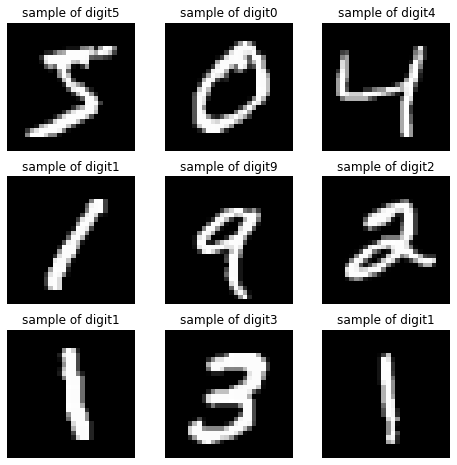

In [4]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i],cmap="gray")
  plt.title("sample of digit"+str(y_train_raw[i]))
  plt.axis("off")

In [5]:
#reshape data 28 x 28 dengan 784 x 1 vector
x_train = x_train_raw.reshape([x_train_raw.shape[0],
                               x_train_raw.shape[1]*x_train_raw.shape[2]])
x_test = x_test_raw.reshape([x_test_raw.shape[0],
                             x_test_raw.shape[1]*x_test_raw.shape[2]])

#normalisasi
x_train=x_train.astype("float32")/255

x_test=x_test.astype("float32")/255

print("dimensi train data: ",x_train.shape)
print("dimensi test data: ", x_test.shape)

dimensi train data:  (60000, 784)
dimensi test data:  (10000, 784)


In [6]:
input_shape = (x_train.shape[1],)
model = tf.keras.Sequential([
                             Dense(units=512, activation="relu", input_shape=input_shape),
                             Dense(units=256, activation="relu"),
                             Dense(units=128, activation="relu"),
                             Dense(units=num_classes, activation="softmax")
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [7]:
use_optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=use_optimizer,
              metrics=["accuracy"])

In [8]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 5s 4ms/step - loss: 0.2289 - accuracy: 0.9326
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0851 - accuracy: 0.9739
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0578 - accuracy: 0.9813
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.9882
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0318 - accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0204 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9939
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0174 - accuracy: 0.9939
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0161 - accuracy: 0.9948

In [10]:
score = model.evaluate(x_test,y_test, verbose=0)
print("test loss:", score[0])
print("test accuracy:", score[0])

test loss: 0.07487230002880096
test accuracy: 0.07487230002880096


In [20]:
#simpan ke drive
model.save(root_path + "model/final_DNN_model.h5")

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

input_shape1 = (28,28,1)
model1=keras.Sequential()

model1.add(Conv2D(filters=32, kernel_size=5, strides=(1,1), padding="same", activation="relu", input_shape=input_shape1))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding="valid"))

model1.add(Dropout(0.25))
model1.add(Flatten())

model1.add(Dense(units=128, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(units=10, activation="softmax"))

In [14]:
X_train=x_train.reshape(60000, 28, 28,1)
X_test=x_test.reshape(10000, 28, 28,1)

model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [15]:
history=model1.fit(x=X_train, y=y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 31s 8ms/step - loss: 0.3122 - accuracy: 0.9051
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1146 - accuracy: 0.9654
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0835 - accuracy: 0.9747
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0697 - accuracy: 0.9789
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0593 - accuracy: 0.9826


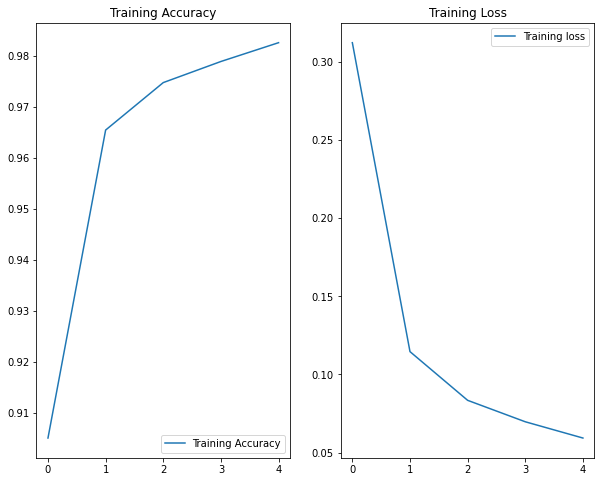

In [17]:
epochs=5
acc=history.history['accuracy']
loss=history.history['loss']

epochs_range=range(epochs)

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label= 'Training loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [18]:
test_loss, test_acc = model1.evaluate(x=X_test, y=y_test)
print("Test Accuracy %.2f"%test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0337 - accuracy: 0.9891
Test Accuracy 0.99


In [21]:
model1.save(root_path+"model/final_CNN_model.h5")
model1.save('./model/final_CNN_model.h5')

In [23]:
from tensorflow.keras.models import load_model

new_model=load_model(root_path+"model/final_CNN_model.h5")

new_model=load_model("model/final_CNN_model.h5")
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


prediksi dari hasil pertama 20 images:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
first 20 image in the sets:


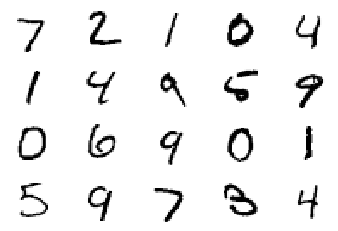

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

def res_visual(n):
  final_opt_a=new_model.predict_classes(X_test[0:n])
  fig, ax = plt.subplots(nrows=int(n/5),ncols=5)
  ax=ax.flatten()
  print('prediksi dari hasil pertama {} images:'.format(n))
  for i in range(n):
    print(final_opt_a[i],end=',')
    if int((i+1)%5)==0:
      print('\t')
    img = X_test[i].reshape((28,28))
    plt.axis("off")
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].axis("off")
  print('first {} image in the sets:'.format(n))
res_visual(20)